# Curso de Métodos Numéricos (DEMAT)
# Tarea 10

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Octubre   26, 2023**  |
| Fecha límite de entrega de la tarea: | **Noviembre  8, 2023**  |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que **incluya
  el notebook** y los archivos adicionales.
- Si todos los códigos que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.
  
---

## Ejercicio 1  (6 puntos)

Tenemos  un conjunto con $n+1$ puntos
$\{(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)\}$.

Para construir el polinomio interpolador de grado $n$,

$$ p_n(x) = a_0 + a_1 x + ... + a_n x^n,$$

podemos resolver el sistema de ecuaciones

$$\mathbf{W}_n \mathbf{a} = \mathbf{y} $$

donde $\mathbf{W}_n$ es la matriz de Vandermonde

$$
\mathbf{W}_n = \left[\begin{array}{ccccc}
1      &  x_0   &     x_0^2 & \cdots & x_0^n \\
1      &  x_1   &     x_1^2 & \cdots & x_1^n \\
\vdots & \vdots &    \vdots & \cdots & \vdots \\
1      & x_{n}  &   x_{n}^2 & \cdots & x_{n}^n
\end{array}\right]
$$

y

$$ \mathbf{a}
=  \left( \begin{array}{c}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{array} \right),
\qquad
\mathbf{y}
=  \left( \begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array} \right).
$$

1. Escriba la función **interpolador1(x,y)** que recibe como entrada el arreglo $\mathbf{x}$
   con las abscisas de los puntos y el arreglo  $\mathbf{y}$ con las ordenadas de los
   puntos. La función debe hacer lo siguiente:
   
- Construir la matriz de Vandermonde $\mathbf{W}_n$
- Calcular la factorización SVD de $\mathbf{W}_n$. Use la función
  [numpy.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).
- Calcular el número de condición $\kappa_2(\mathbf{W}_n)$
- Calcular  la solución (con el método que guste) del sistema de ecuaciones

$$\mathbf{W}_n \mathbf{a} = \mathbf{y} $$

- Calcular la raíz cuadrada del error cuadrático medio

$$ RMSE = \sqrt{\frac{\|\mathbf{W}_n \mathbf{a} - \mathbf{y}\|_2^2}{n+1}} $$

- Devolver el arreglo $\mathbf{a}$ con los coeficientes del polinomio de grado $n$,
  el RMSE y el número de condición $\kappa_2(\mathbf{W}_n)$.
  
2. Escriba la función **evaluarPolinomio(z,a)** que recibe como entrada un
   arreglo de valores $\mathbf{z}=\{z_0, z_1, ..., z_m\}$ y
   el arreglo de coeficientes $\mathbf{a}$.
   La función debe devolver un arreglo con los valores del polinomio interpolador
   en cada elemento del arreglo $\mathbf{z}$, es decir, $\{p_n(z_0), p_n(z_1), ..., p_n(z_m)\}$.
   
3. Probar las funciones anteriores en varios ejemplos que se presentan en las siguientes celdas
   de la lo siguiente manera.
   
**Esto es lo que ya está hecho en cada ejemplo:**
- Se fija el grado $n$ del polinomio
- Se crea el arreglo $\mathbf{x}$ como tomando valores en un intervalo $[a,b]$.
- Creamos dos arreglos de ordenadas $\mathbf{y}_1$ y $\mathbf{y}_2$ evaluando
  una función $f(x)$ en el arreglo $\mathbf{x}$.
  La diferencia entre $\mathbf{y}_1$ y $\mathbf{y}_2$ es que $\mathbf{y}_1$
  tiene los valores $f(x_i)$ haciendo un redondeo a dos decimales mientras
  que $\mathbf{y}_2$ tiene los valores $f(x_i)$ haciendo un redondeo a cuatro decimales.
- Se crea el arreglo $\mathbf{z}$ tomando 100 puntos en el intervalo $[a,b]$.
  
**Esto es lo que tienen que hacer en cada ejemplo:**

- Calcular el arreglo  $\mathbf{a}_1$ usando `interpolador1(x,y1)`.
  Imprima el valor del RMSE y el número de condición.
- Calcular el arreglo  $\mathbf{a}_2$ usando `interpolador1(x,y2)`.
  Imprima el valor del RMSE y el número de condición.
- Imprima  $\|\mathbf{a}_1 - \mathbf{a}_2\|_{\inf}$
- Usando la función `evaluarPolinomio(z,a)` genere un arreglo
  $\mathbf{pz}_1$ con los valores del polinomio en $\mathbf{z}$ usando los coeficientes $\mathbf{a}_1$
  y el arreglo $\mathbf{pz}_2$ con los valores del polinomio en $\mathbf{z}$ usando los coeficientes $\mathbf{a}_2$
- Genere una gráfica que muestre los puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)\}$
  y las gráficas de los polinomios usando el arreglo  $\mathbf{z}$ y  los arreglos $\mathbf{pz}_1$ y $\mathbf{pz}_2$
  para ver las diferencias entre los polinomios.
   
   
El objetivo ver cómo afecta el mal condicionamiento de la matriz
de Vandermonde en la construcción de los polinomios interpoladores.
Si la matriz no estuviera mal condicionada, por ser $\mathbf{y}_1$ y $\mathbf{y}_2$
muy parecidos, lo que espera es que los polinomios fueran también muy
parecidos.

   
### Solución:
   

In [50]:
# Código de las funciones
import numpy as np

def makeVandermonde(X: np.ndarray, n:int):
    return np.array([[x**i for i in range(n+1)] for x in X])

def interpolador1(x: np.ndarray, y:np.ndarray):
    W_n = makeVandermonde(x, x.size -1)
    U, S, Vh = np.linalg.svd(W_n, False)
    # print(f"Numero de condición W_{{}}: {S[0]/S[-1]}")
    k2 = S[0]/S[-1]
    a = np.linalg.solve(W_n, y)
    RSME = np.sqrt(np.linalg.norm(W_n@a - y)**2 / (x.size))
    return a, RSME, k2

def evaluarPolinomio(Z: np.ndarray, a: np.ndarray):
    return np.array([a@[z**i for i in range(a.size)] for z in Z])





In [51]:
import numpy as np
import matplotlib.pyplot as plt


# Definimos la función f(x)
def fncf(x):
    return np.exp(-x*x) + 0.1*x

# Definimos un intervalo [a,b]
a  = -4
b  = 3

Text(0.5, 1.0, 'Datos para el ejemplo 1')

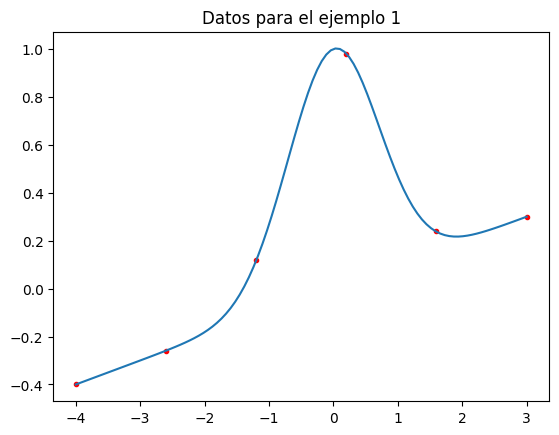

In [52]:
### Ejemplo 1 ####

# Fijamos el grado del polinomio interpolador
n  = 5

# Definimos las abscisas de los puntos 2D como los nodos de una partición uniforme de [a,b]
x  = np.linspace(a, b, n+1)

y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)

z  = np.linspace(np.min(x), np.max(x), 100)

# Graficamos los datos y la función f usando el arreglo y1 que es el tiene menor
# precisión, pero aún así se como si los puntos estuvieran sobre la gráfica de f
plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 1')

Para a1
RSME: 6.0893818402146185e-16
Numero de condición: 1385.4459122166402
Para a2
RSME: 1.5683332967331118e-15
Numero de condición: 1385.4459122166402
0.002532296562939629



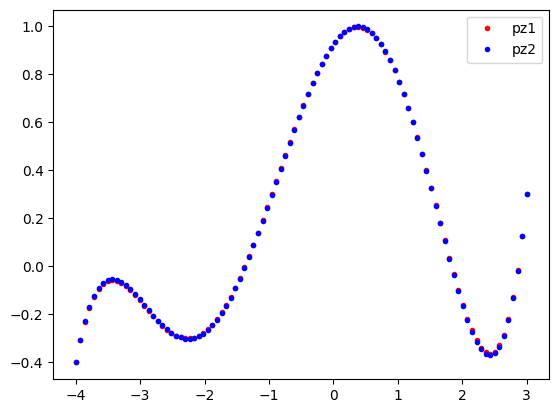

In [53]:
# Prueba de los interpoladores con los datos del Ejemplo 1

print("Para a1")
a1, rsme, k2 = interpolador1(x, y1)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print("Para a2")
a2, rsme, k2 = interpolador1(x, y2)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print(f"{np.linalg.norm(a1-a2, np.inf)}")

pz1 = evaluarPolinomio(z, a1)
pz2 = evaluarPolinomio(z, a2)

plt.plot(z, pz1, ".r", label="pz1")
plt.plot(z, pz2, ".b ", label="pz2")
plt.legend()
print()

Como podemos notar tenemos que los polinomio se parecen mucho.
Sin embargo

Text(0.5, 1.0, 'Datos para el ejemplo 2')

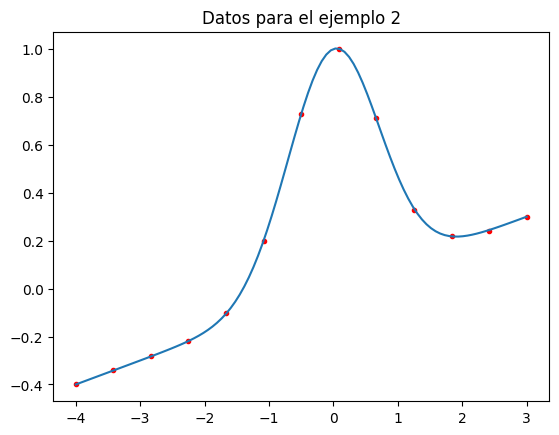

In [54]:
### Ejemplo 2 ####

# Aumentamos el grado del polinomio interpolador para tener más
# puntos, para tratar de que el polinomio se parezca más a la función f
n  = 12

# Definimos las abscisas de los puntos 2D como los nodos de una partición uniforme de [a,b]
x  = np.linspace(a, b, n+1)

y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)

z  = np.linspace(np.min(x), np.max(x), 100)

plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 2')

Para a1
RSME: 6.241622743399355e-14
Numero de condición: 189821636.65613002
Para a2
RSME: 2.0648894717262443e-13
Numero de condición: 189821636.65613002
0.02281235408052715



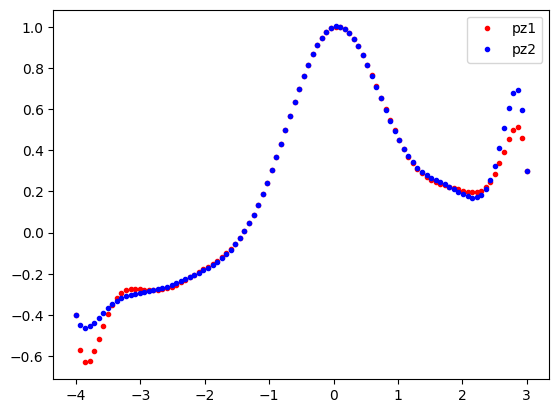

In [55]:
# Prueba de los interpoladores con los datos del Ejemplo 2

print("Para a1")
a1, rsme, k2 = interpolador1(x, y1)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print("Para a2")
a2, rsme, k2 = interpolador1(x, y2)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print(f"{np.linalg.norm(a1-a2, np.inf)}")

pz1 = evaluarPolinomio(z, a1)
pz2 = evaluarPolinomio(z, a2)

plt.plot(z, pz1, ".r", label="pz1")
plt.plot(z, pz2, ".b ", label="pz2")
plt.legend()
print()




Text(0.5, 1.0, 'Datos para el ejemplo 3')

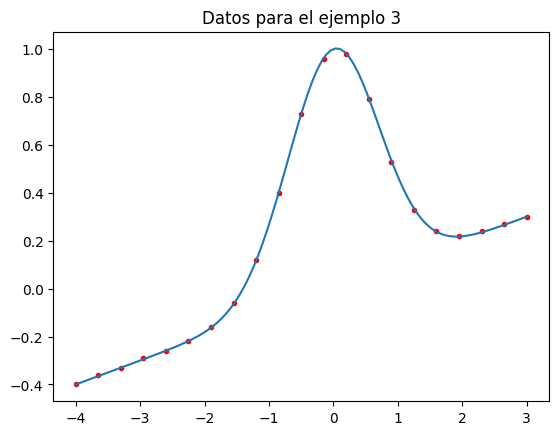

In [56]:
#### Ejemplo 3

n  = 20
x  = np.linspace(a, b, n+1)
y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)

m = 100
z = np.linspace(np.min(x), np.max(x), m)

plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 3')

Para a1
RSME: 1.913691367444542e-10
Numero de condición: 224678865936518.2
Para a2
RSME: 5.172136854070822e-12
Numero de condición: 224678865936518.2
0.35221955919009357



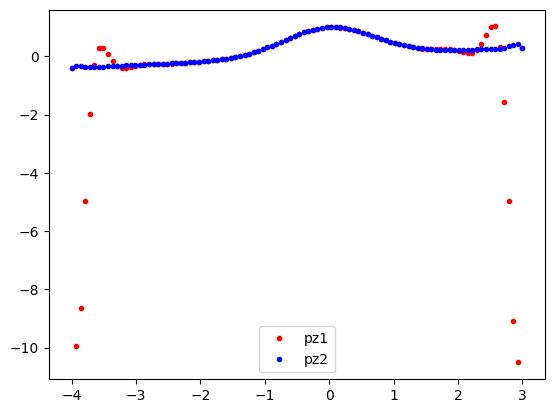

In [57]:
# Prueba de los interpoladores con los datos del Ejemplo 3

print("Para a1")
a1, rsme, k2 = interpolador1(x, y1)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print("Para a2")
a2, rsme, k2 = interpolador1(x, y2)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print(f"{np.linalg.norm(a1-a2, np.inf)}")

pz1 = evaluarPolinomio(z, a1)
pz2 = evaluarPolinomio(z, a2)

plt.plot(z, pz1, ".r", label="pz1")
plt.plot(z, pz2, ".b ", label="pz2")
plt.legend()
print()







Text(0.5, 1.0, 'Datos para el ejemplo 4')

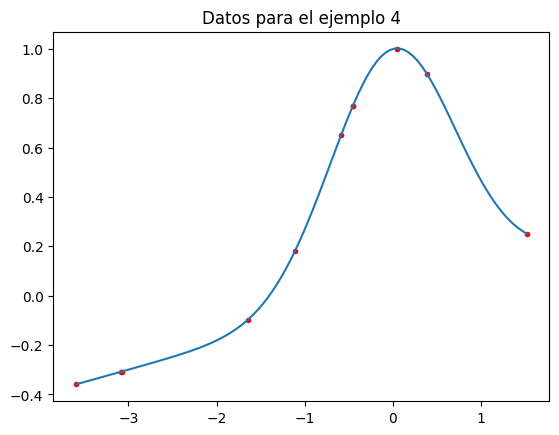

In [58]:
### Ejemplo 4

# En general, los valores en arreglo x no tienen que ordenados o equiespaciados
# En este caso, generamos valores aleatorios en [a, b]

n  = 10
np.random.seed(125)
x  = a + (b-a)*np.random.rand(n+1)
y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)


m = 100
z = np.linspace(np.min(x), np.max(x), m)

plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 4')

Para a1
RSME: 4.058784223525681e-11
Numero de condición: 331438630169.5545
Para a2
RSME: 6.934779115774462e-12
Numero de condición: 331438630169.5545
88.24656519415778



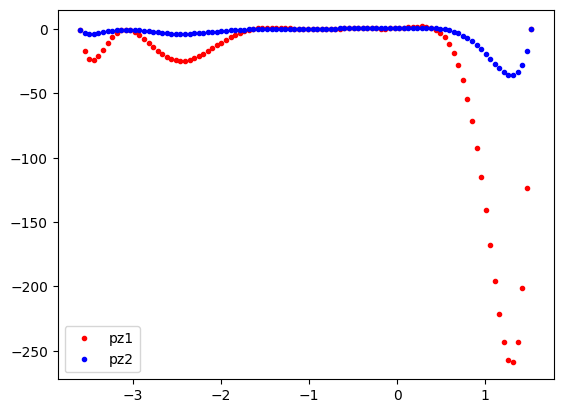

In [59]:
# Prueba de los interpoladores con los datos del Ejemplo 4

print("Para a1")
a1, rsme, k2 = interpolador1(x, y1)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print("Para a2")
a2, rsme, k2 = interpolador1(x, y2)
print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

print(f"{np.linalg.norm(a1-a2, np.inf)}")

pz1 = evaluarPolinomio(z, a1)
pz2 = evaluarPolinomio(z, a2)

plt.plot(z, pz1, ".r", label="pz1")
plt.plot(z, pz2, ".b ", label="pz2")
plt.legend()
print()




_ _

```







```

---

## Ejercicio 2  (4 puntos)

En lugar de resolver el sistema de ecuaciones anterior, vamos a
usar una aproximación.

En general, si tenemos la factorización SVD de una matriz

$$\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^\top$$

La solución del sistema $\mathbf{A}\mathbf{x} =\mathbf{y}$ se puede calcular mediante

$$ \mathbf{x} = \sum_{i=1}^n \frac{\mathbf{u}_{i}^\top \mathbf{y}}{s_i} \mathbf{v}_{i}. $$

Podemos obtener una aproximación a la solución tomando sólo los primeros $r$ términos  de la suma
anterior, con $r<n$:

$$ \mathbf{\hat{x}} = \sum_{i=1}^r \frac{\mathbf{u}_{i}^\top \mathbf{y}}{s_i} \mathbf{v}_{i}. $$


1. Escriba la función **interpolador2(x,y,r)** que hace lo mismo que la función
   **interpolador1(x,y)**, con la diferencia de que en lugar de resolver el sistema
   de ecuaciones $\mathbf{W}_n \mathbf{a} = \mathbf{y},$
   calcula el arreglo de coeficientes del polinomio $\mathbf{a}$ usando la fórmula de aproximación anterior,
   tomando los $r$ primeros términos.
   
2. Para cada uno de los ejemplos del Ejercicio 1, repita los cálculos usando ahora la función
   `interpolador2(x,y,r)` y seleccionando un valor $r$ apropiado de modo que los
   polinomios  que tienen coeficientes $\mathbf{a}_1$ y $\mathbf{a}_2$
   se parezcan.

Note que por tratar de que no difieran tanto los polinomios, ya no se va a cumplir
que $p_n(x_i) = y_i$. El valor $r$ que elijan estable ese comprimiso entre
que los polinomios interpolen los datos o que cambien demasiado ante pequeñas variaciones
en los datos.

### Solución:

In [60]:
# Código de la función
import numpy as np

def interpolador2(x: np.ndarray, y: np.ndarray, r:int):
    W_n = makeVandermonde(x, x.size -1)
    U, S, Vh = np.linalg.svd(W_n)
    k2 = S[0]/S[-1]
    print(U.shape, S.shape, Vh.shape, r, x.size-1)
    # a = (U.T[np.arange(r)] @ y)/S[:r] @ Vh.T[np.arange(r)]
    # a = (Vh.T[np.arange(r)]@ y)/S[:r] @U.T[np.arange(r)]
    a = np.zeros(y.size)
    for i in range(r):
        a += Vh.T[i] * U.T[i] @ y/S[i]
    RSME = np.sqrt(np.linalg.norm(W_n@a - y)**2 / (x.size))
    return a, RSME, k2




In [61]:
def test_interpolador2(x: np.ndarray, y1: np.ndarray, y2: np.ndarray, r:int):
    print("Para a1")
    a1, rsme, k2 = interpolador2(x, y1, r)
    print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

    print("Para a2")
    a2, rsme, k2 = interpolador2(x, y2, r)
    print(f"RSME: {rsme}", f"Numero de condición: {k2}", sep='\n')

    print(f"{np.linalg.norm(a1-a2, np.inf)}")

    pz1 = evaluarPolinomio(z, a1)
    pz2 = evaluarPolinomio(z, a2)

    plt.plot(z, pz1, ".r", label="pz1")
    plt.plot(z, pz2, ".b ", label="pz2")
    plt.legend()
    print()

In [62]:
W = np.arange(9).reshape(3, 3)
y = np.array([1, 2, 3])
W, y,(W[np.arange(2)] @ y)/np.array([2, 2]) @ W.T[np.arange(2)]

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([1, 2, 3]),
 array([ 13.,  64., 115.]))

Text(0.5, 1.0, 'Datos para el ejemplo 1')

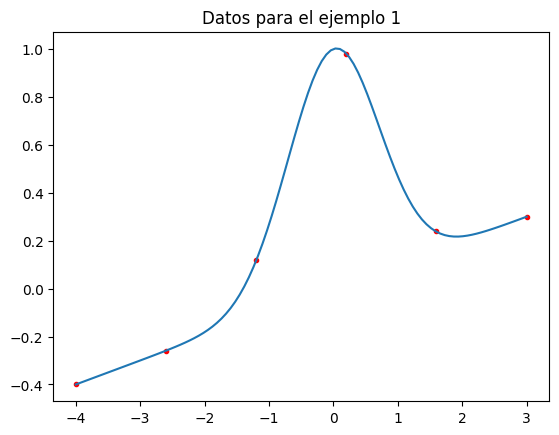

In [63]:
# Pruebas

### Ejemplo 1 ####

# Fijamos el grado del polinomio interpolador
n  = 5

# Definimos las abscisas de los puntos 2D como los nodos de una partición uniforme de [a,b]
x  = np.linspace(a, b, n+1)

y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)

z  = np.linspace(np.min(x), np.max(x), 100)

# Graficamos los datos y la función f usando el arreglo y1 que es el tiene menor
# precisión, pero aún así se como si los puntos estuvieran sobre la gráfica de f
plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 1')


Para a1
(6, 6) (6,) (6, 6) 5 5
RSME: 8.334974009688517
Numero de condición: 1385.4459122166402
Para a2
(6, 6) (6,) (6, 6) 5 5
RSME: 8.058223573497395
Numero de condición: 1385.4459122166402
0.0007534544995904981



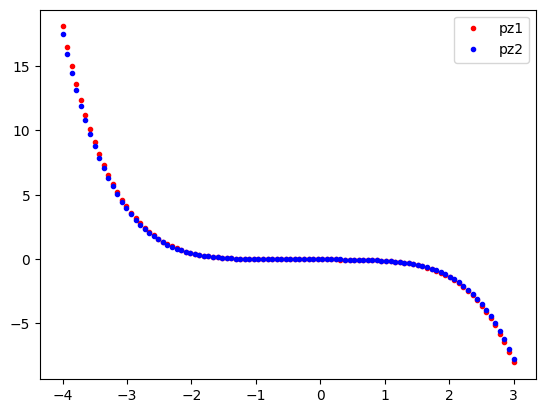

In [64]:
test_interpolador2(x, y1, y2, n)

Text(0.5, 1.0, 'Datos para el ejemplo 2')

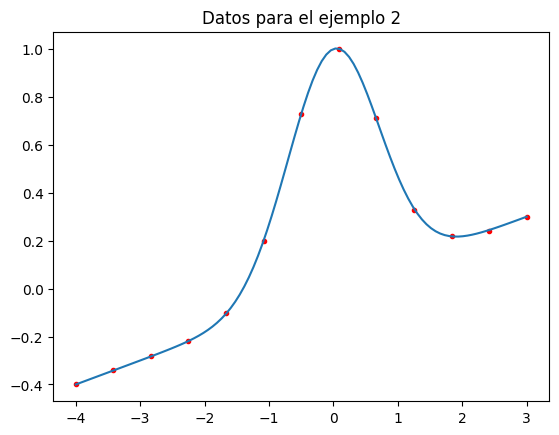

In [65]:
### Ejemplo 2 ####

# Aumentamos el grado del polinomio interpolador para tener más
# puntos, para tratar de que el polinomio se parezca más a la función f
n  = 12

# Definimos las abscisas de los puntos 2D como los nodos de una partición uniforme de [a,b]
x  = np.linspace(a, b, n+1)

y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)

z  = np.linspace(np.min(x), np.max(x), 100)

plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 2')

Para a1
(13, 13) (13,) (13, 13) 12 12
RSME: 157097.43410263324
Numero de condición: 189821636.65613002
Para a2
(13, 13) (13,) (13, 13) 12 12
RSME: 154887.70552641395
Numero de condición: 189821636.65613002
0.0005863125036772859



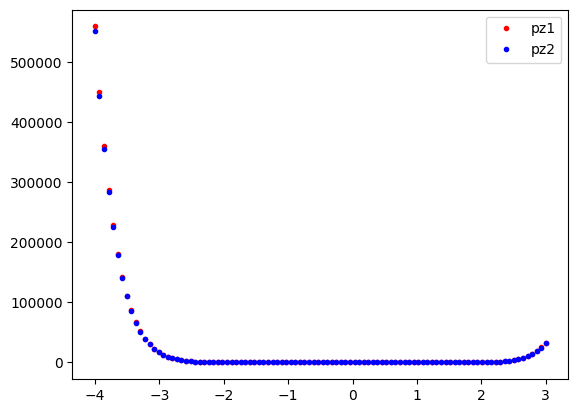

In [66]:
test_interpolador2(x, y1, y2, n)

Text(0.5, 1.0, 'Datos para el ejemplo 3')

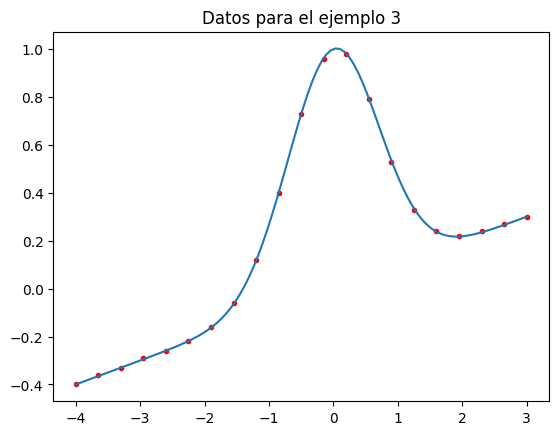

In [67]:
#### Ejemplo 3

n  = 20
x  = np.linspace(a, b, n+1)
y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)

m = 100
z = np.linspace(np.min(x), np.max(x), m)

plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 3')

Para a1
(21, 21) (21,) (21, 21) 20 20
RSME: 32430907943.57608
Numero de condición: 224678865936518.2
Para a2
(21, 21) (21,) (21, 21) 20 20
RSME: 32388387922.453255
Numero de condición: 224678865936518.2
0.00021878435914998717



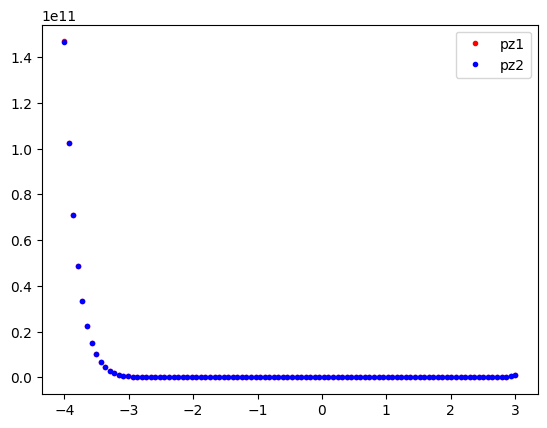

In [68]:
test_interpolador2(x, y1, y2, n)

Text(0.5, 1.0, 'Datos para el ejemplo 4')

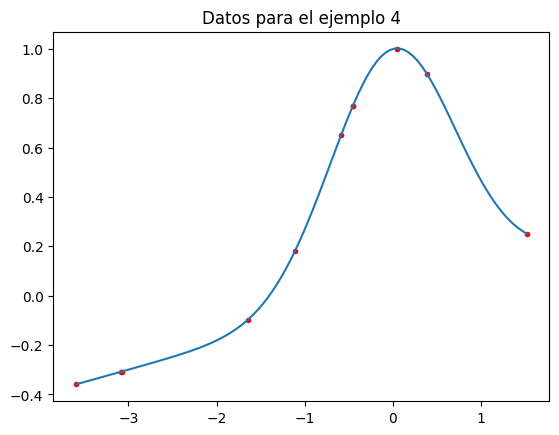

In [69]:
### Ejemplo 4

# En general, los valores en arreglo x no tienen que ordenados o equiespaciados
# En este caso, generamos valores aleatorios en [a, b]

n  = 10
np.random.seed(125)
x  = a + (b-a)*np.random.rand(n+1)
y1 = np.round(fncf(x), 2)
y2 = np.round(fncf(x), 4)


m = 100
z = np.linspace(np.min(x), np.max(x), m)

plt.plot(x, y1, 'r.', z, fncf(z))
plt.title('Datos para el ejemplo 4')

Para a1
(11, 11) (11,) (11, 11) 10 10
RSME: 47898.0539058233
Numero de condición: 331438630169.5545
Para a2
(11, 11) (11,) (11, 11) 10 10
RSME: 48767.02479451293
Numero de condición: 331438630169.5545
0.009758180218889079



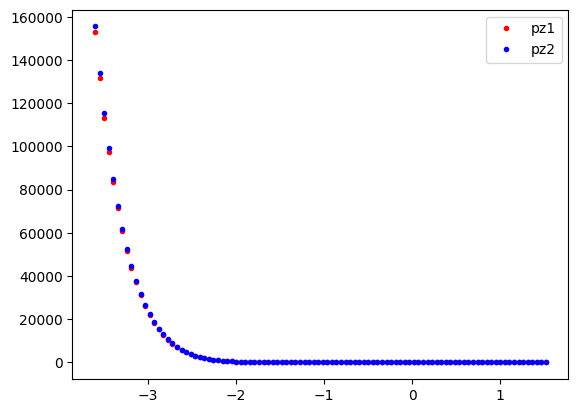

In [70]:
test_interpolador2(x, y1, y2, n)